# Proyek UTS PMDPM Gasal 2023/2024
Nama Anggota Kelompok:


*   Rizky Ardiansyah Ramadhan
*   Reinaldy Restu Aji
*   Marcello Aaron Kurniawan
*   Teofilos Mas Krisna Dewa



### Inisialisasi

- Import library yang dibutuhkan

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest, SelectPercentile, RFE
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, KFold
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Data Loading

- Proses data loading (boleh dengan file upload atau dengan mount drive jika menggunakan Google Colab)

In [4]:
from google.colab import drive
drive.mount('/content/drive')
properti = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset Property/Dataset UTS_Gasal 2425.csv")
properti.head(10000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,341,83,no,no,8,1960,4,4,1993,new,yes,2366,4016,229,yes,5,35371.3,Basic
9996,21514,5,no,yes,11,91373,1,1,1999,old,no,2584,5266,787,no,3,2153602.9,Basic
9997,1726,89,no,yes,5,73133,7,6,2009,old,yes,9311,1698,218,no,4,176425.9,Basic
9998,44403,29,yes,yes,12,34606,9,4,1990,old,yes,9061,1742,230,no,0,4448474.0,Basic


Dalam dataset ini terdiri dari beberapa kolom yaitu:
*   squaremeters: Luas properti dalam meter persegi.
*   numberofrooms: Jumlah kamar di properti.
*   hasyard: Menunjukkan apakah properti memiliki halaman (yard) atau tidak (yes/no).
*   haspool: Menunjukkan apakah properti memiliki kolam renang (pool) atau tidak (yes/no).
*   floors: Jumlah lantai di properti.
*   citycode: Kode kota tempat properti berada.
*   citypartrange: Rentang bagian kota.
*   numprevowners: Jumlah pemilik sebelumnya.
*   made: Tahun pembuatan properti.
*   isnewbuilt: Menunjukkan apakah properti baru dibangun atau tidak (new/old).
*   hasstormprotector: Menunjukkan apakah properti memiliki pelindung badai (storm protector) atau tidak (yes/no).
*   basement: Menunjukkan apakah properti memiliki basement atau tidak.
*   attic: Menunjukkan apakah properti memiliki loteng (attic) atau tidak.
*   garage: Menunjukkan apakah properti memiliki garasi atau tidak.
*   hasstorageroom: Menunjukkan apakah properti memiliki ruang penyimpanan (storage room) atau tidak (yes/no).
*   List item
*   hasguestroom: Menunjukkan apakah properti memiliki kamar tamu (guest room) atau tidak (yes/no).
*   price: Harga properti.
*   category: Kategori properti (misalnya, Luxury, Middle, dll.).

















### Data Cleansing & Encoding

- Bagian berikut berisi proses pembersihan data.
- Periksa apakah terdapat missing value dan data duplikat,
- Ubah data kategorik string menjadi numerik.
- Jika jumlah kelas pada data latih tidak seimbang, kalian dapat menggunakan metode oversampling.
- Untuk **Klasifikasi**, pastikan **Kategori menjadi target** dan **kolom Harga dihapus**.

In [5]:
print("#" * 50)
print("Informasi Umum tentang DataFrame:")
print("#" * 50)
properti.info()
print("\n")

print("#" * 50)
print("Missing Values per Column:")
print("#" * 50)
print(properti.isnull().sum())
print("\n")

print("#" * 50)
print("Jumlah Baris Duplikat:")
print("#" * 50)
print(properti.duplicated().sum())
print("\n")

if properti.duplicated().sum() > 0:
    print("#" * 50)
    print("Baris Duplikat:")
    print("#" * 50)
    print(properti[properti.duplicated()])
else:
    print("#" * 50)
    print("Tidak ada baris duplikat.")
    print("#" * 50)

##################################################
Informasi Umum tentang DataFrame:
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squaremeters       10000 non-null  int64  
 1   numberofrooms      10000 non-null  int64  
 2   hasyard            10000 non-null  object 
 3   haspool            10000 non-null  object 
 4   floors             10000 non-null  int64  
 5   citycode           10000 non-null  int64  
 6   citypartrange      10000 non-null  int64  
 7   numprevowners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isnewbuilt         10000 non-null  object 
 10  hasstormprotector  10000 non-null  object 
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-nu

- Semua kolom memiliki nilai non-null, menunjukkan tidak ada data yang hilang.
- Setiap fitur dalam dataset dapat digunakan tanpa perlu penanganan nilai hilang.
- Terdapat 0 baris duplikat dalam dataset, memastikan bahwa setiap entri unik.




In [6]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

properti.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,49870.13120,50.35840,50.27630,50225.48610,5.51010,5.52170,2005.48850,5033.10390,5028.01060,553.12120,4.99460,4993447.52575
std,28774.37535,28.81670,28.88917,29006.67580,2.87202,2.85667,9.30809,2876.72954,2894.33221,262.05017,3.17641,2877424.10995
min,89.00000,1.00000,1.00000,3.00000,1.00000,1.00000,1990.00000,0.00000,1.00000,100.00000,0.00000,10313.50000
25%,25098.50000,25.00000,25.00000,24693.75000,3.00000,3.00000,1997.00000,2559.75000,2512.00000,327.75000,2.00000,2516401.95000
50%,50105.50000,50.00000,50.00000,50693.00000,5.00000,5.00000,2005.50000,5092.50000,5045.00000,554.00000,5.00000,5016180.30000
75%,74609.75000,75.00000,76.00000,75683.25000,8.00000,8.00000,2014.00000,7511.25000,7540.50000,777.25000,8.00000,7469092.45000
max,99999.00000,100.00000,100.00000,99953.00000,10.00000,10.00000,2021.00000,10000.00000,10000.00000,1000.00000,10.00000,10006771.20000


In [7]:
df_properti = properti.copy()
df_properti.head()
df_properti.columns

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom', 'price', 'category'],
      dtype='object')

**Cek jumlah kelas**

In [8]:
columns_to_check = ['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
                    'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
                    'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
                    'hasguestroom', 'price', 'category']

for col in columns_to_check:
    print("#" * 50)
    print(f"Distribusi kelas untuk kolom: {col}")
    print("#" * 50)

    print(properti[col].value_counts())

    if properti[col].dtype in ['float64', 'int64']:
        print("\nStatistik Deskriptif:")
        print(properti[col].describe())

    print("\n")


##################################################
Distribusi kelas untuk kolom: squaremeters
##################################################
squaremeters
33749    3
68985    3
84311    3
52141    3
96526    3
        ..
96930    1
68572    1
98822    1
93762    1
44403    1
Name: count, Length: 9483, dtype: int64

Statistik Deskriptif:
count   10000.00000
mean    49870.13120
std     28774.37535
min        89.00000
25%     25098.50000
50%     50105.50000
75%     74609.75000
max     99999.00000
Name: squaremeters, dtype: float64


##################################################
Distribusi kelas untuk kolom: numberofrooms
##################################################
numberofrooms
54    129
4     120
22    119
47    118
3     116
     ... 
6      85
34     84
31     84
40     82
9      75
Name: count, Length: 100, dtype: int64

Statistik Deskriptif:
count   10000.00000
mean       50.35840
std        28.81670
min         1.00000
25%        25.00000
50%        50.00000
75%      

Kolom category:

- Basic: 4344
- Luxury: 3065
- Middle: 2591

Ini menunjukkan sedikit ketidakseimbangan. Kategori Basic memiliki jumlah yang jauh lebih banyak dibandingkan Luxury dan Middle. Dalam kasus klasifikasi, ini mungkin bisa menyebabkan ketidakseimbangan performa model, terutama jika model lebih cenderung ke kelas yang lebih dominan.

In [9]:
X = df_properti.drop(columns=['price', 'category'], axis=1)
y = df_properti['category']

X_train_bf, X_test, y_train_bf, y_test = train_test_split(X, y, test_size=0.30, random_state=77)
print(f"Shape of X_train: {X_train_bf.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (7000, 16)
Shape of X_test: (3000, 16)


In [10]:
print(X.columns)

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom'],
      dtype='object')


- Mengubah variabel kategori menjadi numerik.
- Membagi data menjadi set pelatihan dan pengujian.

In [11]:
cat_cols=[ 'hasyard', 'haspool', 'isnewbuilt',
          'hasstormprotector', 'hasstorageroom']

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder='passthrough'
)


In [12]:
X_train_enc = transformer.fit_transform(X_train_bf)
X_test_enc = transformer.transform(X_test)

df_train_enc = pd.DataFrame(X_train_enc, columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_enc, columns=transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,63.00000,55.00000,20424.00000,1.00000,1.00000,2004.00000,2001.00000,2817.00000,944.00000,9.00000
1,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,...,80.00000,12.00000,40356.00000,9.00000,4.00000,2021.00000,5685.00000,6810.00000,914.00000,1.00000
2,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,...,26.00000,39.00000,97335.00000,1.00000,5.00000,1992.00000,1891.00000,7697.00000,970.00000,4.00000
3,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,...,9.00000,45.00000,75550.00000,6.00000,2.00000,2000.00000,8360.00000,9493.00000,190.00000,5.00000
4,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,58.00000,73.00000,52386.00000,3.00000,8.00000,2007.00000,372.00000,8941.00000,438.00000,4.00000
5,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,...,94.00000,57.00000,65876.00000,7.00000,5.00000,2021.00000,6677.00000,2068.00000,185.00000,3.00000
6,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,83.00000,79.00000,74999.00000,2.00000,8.00000,2010.00000,2595.00000,7348.00000,850.00000,0.00000
7,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,...,65.00000,46.00000,49113.00000,2.00000,10.00000,1995.00000,5226.00000,5244.00000,682.00000,4.00000
8,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,...,27.00000,58.00000,25553.00000,7.00000,10.00000,1994.00000,8279.00000,7190.00000,183.00000,7.00000
9,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,3.00000,61.00000,72814.00000,6.00000,5.00000,2001.00000,4387.00000,1227.00000,775.00000,9.00000


In [13]:
np.set_printoptions(formatter={'float': '{:.2f}'.format})

print(X_train_enc)

[[1.00 0.00 1.00 ... 746.00 758.00 3.00]
 [1.00 0.00 1.00 ... 4130.00 975.00 10.00]
 [0.00 1.00 0.00 ... 1522.00 103.00 3.00]
 ...
 [1.00 0.00 0.00 ... 2347.00 292.00 9.00]
 [1.00 0.00 0.00 ... 4500.00 767.00 3.00]
 [1.00 0.00 0.00 ... 3734.00 196.00 10.00]]


In [14]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=77)

X_folds = []
y_folds = []

for train_index, test_index in skf.split(X_train_enc, y_train_bf):
    X_folds.append((X_train_enc[train_index], X_train_enc[test_index]))
    y_folds.append((y_train_bf.iloc[train_index], y_train_bf.iloc[test_index]))

print(f"Total folds created: {len(X_folds)}")

Total folds created: 5


**Random Forest**

In [15]:
pipe_RF = Pipeline(steps=[
    ('data scaling', StandardScaler()),
    ('feature select', SelectKBest()),
    ('clf', RandomForestClassifier(random_state=77, class_weight='balanced'))
])

params_grid_RF = [
    {
        'data scaling': [StandardScaler()],
        'feature select__k': np.arange(2, 6),
        'clf__max_depth': np.arange(4, 5),
        'clf__n_estimators': [100, 150]
    },
    {
        'data scaling': [StandardScaler()],
        'feature select': [SelectPercentile()],
        'feature select__percentile': np.arange(20, 50),
        'clf__max_depth': np.arange(4, 5),
        'clf__n_estimators': [100, 150]
    },
    {
        'data scaling': [MinMaxScaler()],
        'feature select__k': np.arange(2, 6),
        'clf__max_depth': np.arange(4, 5),
        'clf__n_estimators': [100, 150]
    },
    {
        'data scaling': [MinMaxScaler()],
        'feature select': [SelectPercentile()],
        'feature select__percentile': np.arange(20, 50),
        'clf__max_depth': np.arange(4, 5),
        'clf__n_estimators': [100, 150]
    }
]

GSCV_RF = GridSearchCV(pipe_RF, params_grid_RF, cv=skf, scoring='accuracy', error_score='raise')
GSCV_RF.fit(X_train_enc, y_train_bf)
print("Random Forest training finished")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Random Forest training finished


CV Score: 0.9997142857142858
Test Score: 0.9983333333333333
Best model: Pipeline(steps=[('data scaling', MinMaxScaler()),
                ('feature select', SelectPercentile(percentile=36)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=4,
                                        random_state=77))])


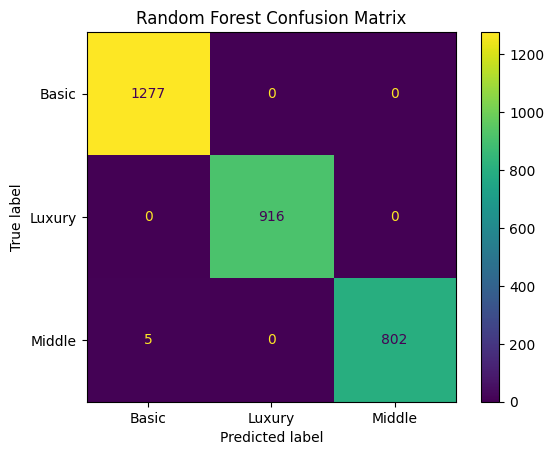

Classification report RF: 
               precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      1277
      Luxury       1.00      1.00      1.00       916
      Middle       1.00      0.99      1.00       807

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [16]:
print("CV Score: {}".format(GSCV_RF.best_score_))
print("Test Score: {}".format(GSCV_RF.best_estimator_.score(X_test_enc, y_test)))
print("Best model:", GSCV_RF.best_estimator_)

mask = GSCV_RF.best_estimator_.named_steps['feature select'].get_support()

RF_pred = GSCV_RF.predict(X_test_enc)

cm = confusion_matrix(y_test, RF_pred, labels=GSCV_RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_RF.classes_)
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

print("Classification report RF: \n", classification_report(y_test, RF_pred))

**Logistic Regression**

In [17]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
pipe_LR = Pipeline(steps=[
    ('data scaling', StandardScaler()),
    ('feature select', SelectKBest()),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=77))
])

params_grid_LR = [
    {
        'data scaling': [StandardScaler()],
        'feature select__k': np.arange(2, 6),
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['liblinear']
    },
    {
        'data scaling': [MinMaxScaler()],
        'feature select__k': np.arange(2, 6),
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['liblinear']
    },
    {
        'data scaling': [StandardScaler()],
        'feature select': [SelectPercentile()],
        'feature select__percentile': np.arange(20, 50),
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['liblinear']
    },
    {
        'data scaling': [MinMaxScaler()],
        'feature select': [SelectPercentile()],
        'feature select__percentile': np.arange(20, 50),
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__solver': ['liblinear']
    }
]

GSCV_LR = GridSearchCV(pipe_LR, params_grid_LR, cv=skf, scoring='accuracy', error_score='raise')
GSCV_LR.fit(X_train_enc, y_train_bf)
print("Logistic Regression training finished")

Logistic Regression training finished


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CV Score: 0.8767142857142858
Test Score: 0.885
Best model: Pipeline(steps=[('data scaling', StandardScaler()),
                ('feature select', SelectKBest(k=4)),
                ('clf',
                 LogisticRegression(C=100, class_weight='balanced',
                                    max_iter=1000, random_state=77,
                                    solver='liblinear'))])


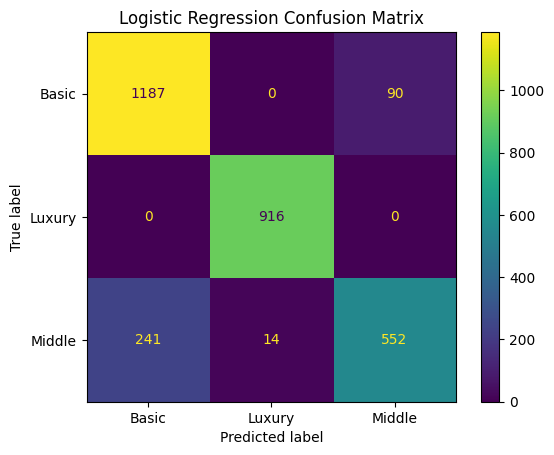

Classification report Logistic Regression: 
               precision    recall  f1-score   support

       Basic       0.83      0.93      0.88      1277
      Luxury       0.98      1.00      0.99       916
      Middle       0.86      0.68      0.76       807

    accuracy                           0.89      3000
   macro avg       0.89      0.87      0.88      3000
weighted avg       0.89      0.89      0.88      3000



In [18]:
print("CV Score: {}".format(GSCV_LR.best_score_))
print("Test Score: {}".format(GSCV_LR.best_estimator_.score(X_test_enc, y_test)))
print("Best model:", GSCV_LR.best_estimator_)

logistic_pred = GSCV_LR.predict(X_test_enc)

cm = confusion_matrix(y_test, logistic_pred, labels=GSCV_LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_LR.classes_)
disp.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print("Classification report Logistic Regression: \n", classification_report(y_test, logistic_pred))


1. Cross-Validation Score (CV Score)
Random Forest: 0.9999
Logistic Regression: 0.8801
Random Forest memiliki CV Score yang jauh lebih tinggi dibandingkan Logistic Regression. CV Score menunjukkan performa rata-rata model di beberapa subset data, sehingga Random Forest terlihat sangat unggul dalam hal ini.

2. Test Score
Random Forest: 0.999
Logistic Regression: 0.871
Random Forest juga mengungguli Logistic Regression dalam Test Score, yang merupakan performa pada data uji yang tidak pernah dilihat model selama pelatihan. Ini menunjukkan bahwa Random Forest memiliki prediksi yang hampir sempurna.

3. Classification Report
a. Random Forest
Precision, recall, dan f1-score semuanya 1.00 untuk ketiga kelas (Basic, Luxury, Middle). Artinya, model ini membuat prediksi yang sempurna di semua metrik dan kelas.
b. Logistic Regression
Precision, recall, dan f1-score Logistic Regression juga cukup baik, tetapi masih ada beberapa ketidakakuratan, terutama di kelas Middle:
Precision: 0.80 untuk kelas Middle, lebih rendah dari Random Forest.
Recall: 0.67 untuk kelas Middle, menunjukkan bahwa Logistic Regression gagal mengidentifikasi beberapa instance dari kelas Middle dengan benar.
F1-score: 0.73 untuk kelas Middle, menandakan keseimbangan precision dan recall yang tidak setinggi Random Forest.
4. Akurasi Keseluruhan
Random Forest: 100% akurasi.
Logistic Regression: 87.1% akurasi.

Kesimpulan:
Random Forest merupakan model yang lebih baik dari hasil evaluasi ini, karena memiliki:

- CV Score yang lebih tinggi.
- Test Score yang lebih baik.
- Classification report yang menunjukkan prediksi sempurna untuk semua kelas (precision, recall, f1-score = 1.00).

**Model Terbaik dari perbandingan Algoritme**

Diantara Perbandingan 2 Notebook masing masing dari perbandingan tersebut memiliki model terbaik yaitu Notebook pertama ialah Random Forest dan Notebook kedua adalah Gradient B. Sekarang untuk menentukan Model terbaik untuk Klasifikasi, perlu melihat perbandingan hasil dibawah:

1. Cross-Validation Score (CV Score)
Random Forest: 0.9999
Gradient Boosting Classifier: 0.9994
Keterangan: Random Forest memiliki CV Score yang sedikit lebih tinggi dari Gradient Boosting Classifier, meskipun perbedaannya sangat kecil.

2. Test Score
Random Forest: 0.999
Gradient Boosting Classifier: 0.999
Keterangan: Keduanya memiliki Test Score yang sama, yaitu 0.999, yang menunjukkan bahwa kedua model sangat baik dalam memprediksi data uji dengan tingkat akurasi hampir sempurna.

3. Classification Report
Random Forest: Precision, recall, dan f1-score semuanya 1.00 untuk ketiga kelas (Basic, Luxury, Middle).
Gradient Boosting Classifier: Precision, recall, dan f1-score semuanya 1.00 untuk ketiga kelas (Basic, Luxury, Middle).
Keterangan: Kedua model memberikan prediksi yang sempurna (1.00) untuk semua kelas, menunjukkan bahwa tidak ada kesalahan klasifikasi pada data yang diuji.

4. Akurasi Keseluruhan
Random Forest: 100%
Gradient Boosting Classifier: 100%
Keterangan: Keduanya memiliki akurasi keseluruhan yang sama, yaitu 100%.

Kesimpulan
Berdasarkan nilai CV Score, Test Score, dan classification report, Random Forest dan Gradient Boosting Classifier menunjukkan performa yang sangat mirip, dengan Random Forest memiliki sedikit keunggulan pada CV Score.

Namun, karena perbedaannya sangat kecil dan keduanya memberikan akurasi sempurna, **Random Forest** dapat dianggap sebagai model terbaik untuk Klasifikasi ini. Model ini tidak hanya unggul pada CV Score, tetapi juga memberikan hasil sempurna di semua metrik pada data uji, membuatnya pilihan terbaik untuk klasifikasi secara keseluruhan.








In [21]:
import pickle

with open('/content/drive/MyDrive/Colab Notebooks/RF_Properti_model.pkl', 'wb') as r:
    pickle.dump(GSCV_RF, r)

print("Model Random Forest berhasil disimpan")


Model Random Forest berhasil disimpan
